In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime





In [2]:
#load the data
df = pd.read_csv("climate_action_data.csv")

In [4]:
#Data inspection
#preview the first five rows of the dataframe
df.head()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [5]:
#Structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [8]:
#Missing values
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [9]:
#Data types
df.dtypes

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [10]:
#Statistical summary
df.describe()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1779,2026-01-02,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2779
freq,2,2,5,11,13,8,203,8,11,2


In [11]:
#shape of the data(rows, columns)
print("Shape of the data:", df.shape)

Shape of the data: (913, 10)


In [12]:
#Handling missing values
#For numerical columns, we can fill missing values with the mean or median
numerical_cols=['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']

for col in numerical_cols:
    #convert to numeric, forcing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    #fill NaN values with the mean of the column
    df[col] = df[col].fillna(df[col].mean())
    
#For categorical columns, we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col]=df[col].fillna(df[col].mode()[0])  
        
#checking for missing values again
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)   

Missing values after handling:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [13]:
#Duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 111


In [14]:
#Remove duplicate rows
df = df.drop_duplicates()
print("Shape of the data after removing duplicates:", df.shape)

Shape of the data after removing duplicates: (802, 10)


In [15]:
#drop null dates
df = df.dropna(subset=['Date'])

In [16]:
#Checking for null values again
df.isnull().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [17]:
df

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
...,...,...,...,...,...,...,...,...,...,...
796,SEN-1796,2027-03-08,75.25,5.46,20.6,86.5,Beans,133.5,16.1,IMG-2796
797,SEN-1797,2027-03-09,49.56,4.78,18.4,82.6,Tomatoes,58.0,8.4,IMG-2797
798,SEN-1798,2027-03-10,58.77,4.80,29.0,36.2,Tomatoes,113.4,26.6,IMG-2798
799,SEN-1799,2027-03-11,74.57,7.63,28.8,53.6,Maize,105.6,25.4,IMG-2799


In [21]:
# Final clean dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      798 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               798 non-null    float64
 3   Soil_pH                        798 non-null    float64
 4   Temperature(C)                 798 non-null    float64
 5   Humidity(%)                    798 non-null    float64
 6   Crop_Type                      798 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  798 non-null    float64
 8   Irrigation_Recommended(mm)     798 non-null    float64
 9   Drone_Image_ID                 798 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.6+ KB


In [22]:
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

Missing values after all cleaning:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [23]:
# Final shape of the data
print("Final shape of the data:", df.shape)

Final shape of the data: (798, 10)


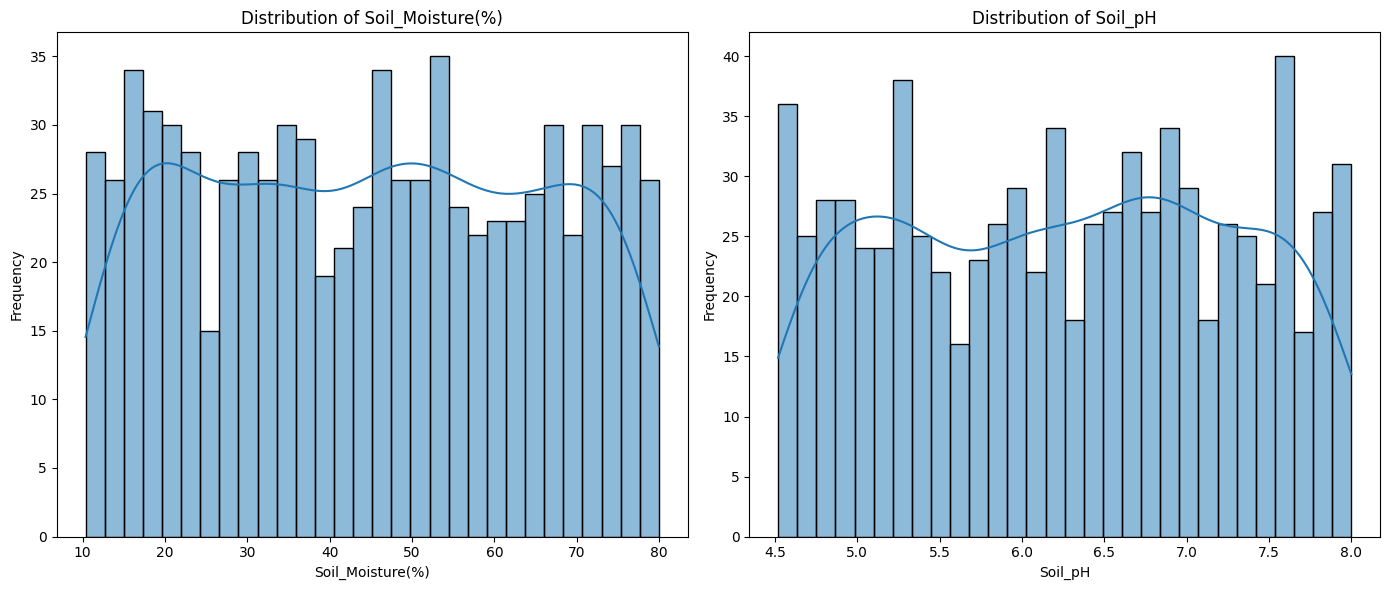

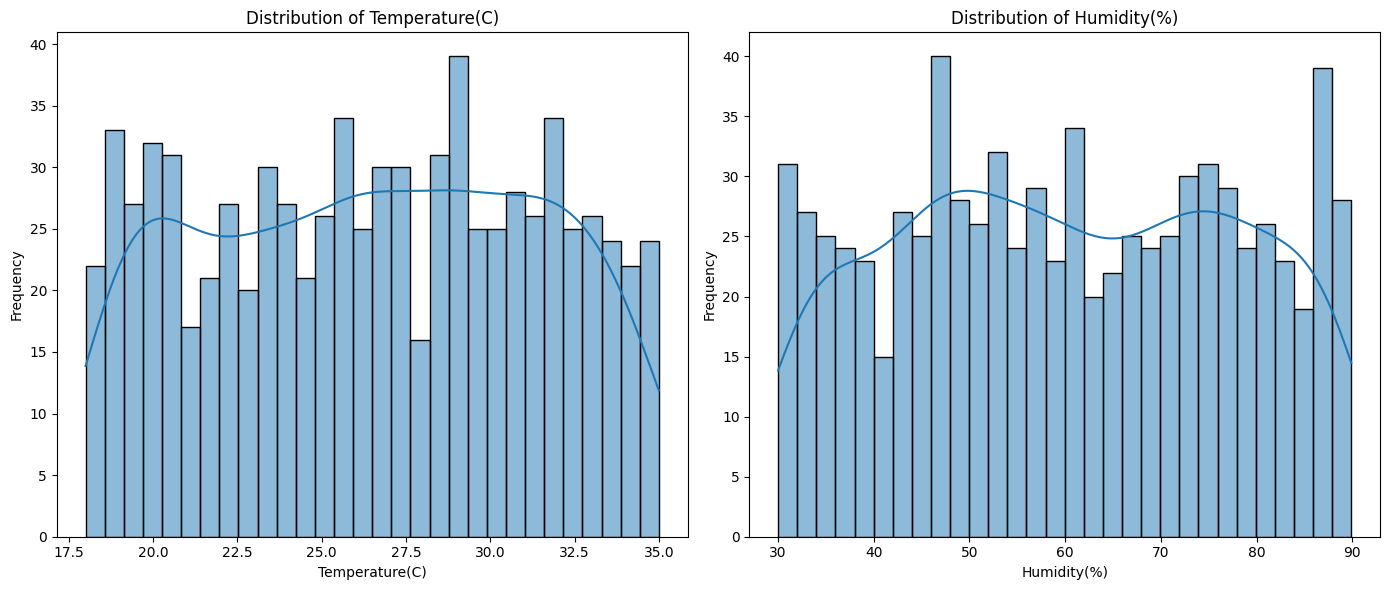

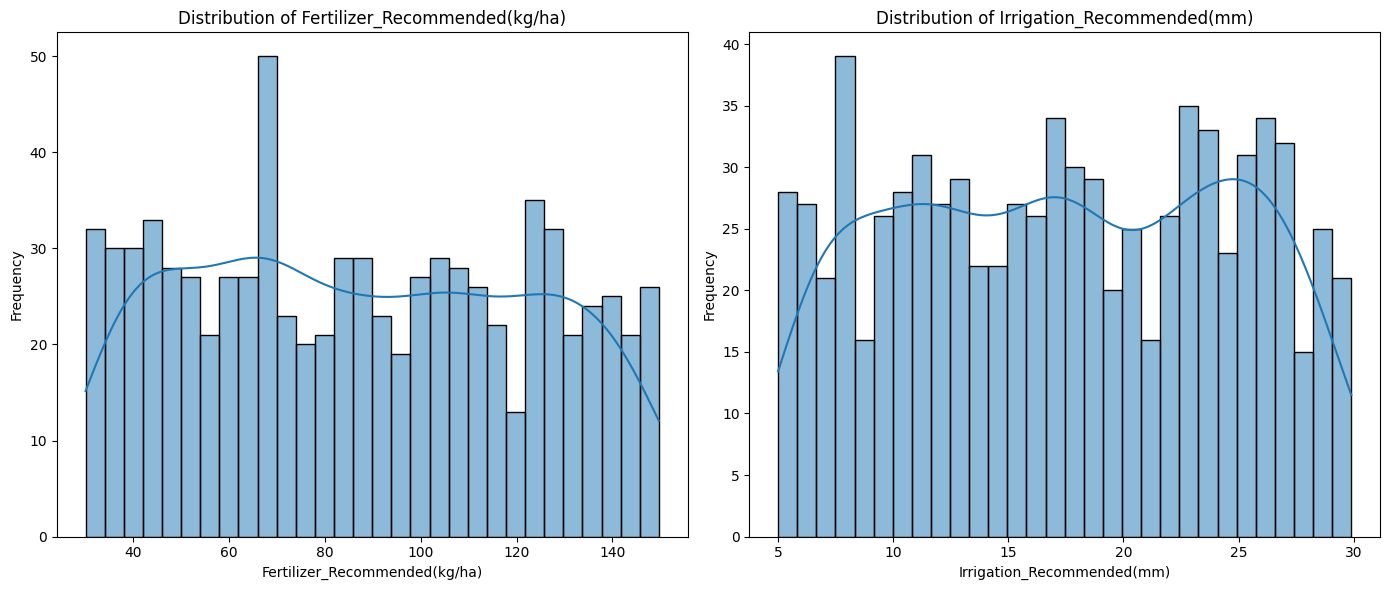

In [27]:
#Visualisation of the data
#Distribution of numeric variables using a histogram
for i in range(0, len(numerical_cols), 2):
    plt.figure(figsize=(14, 6))

    # Plot first in pair
    plt.subplot(1, 2, 1)
    sns.histplot(df[numerical_cols[i]], kde=True, bins=30)
    plt.title(f'Distribution of {numerical_cols[i]}')
    plt.xlabel(numerical_cols[i])
    plt.ylabel('Frequency')

    # Plot second in pair if it exists
    if i + 1 < len(numerical_cols):
        plt.subplot(1, 2, 2)
        sns.histplot(df[numerical_cols[i + 1]], kde=True, bins=30)
        plt.title(f'Distribution of {numerical_cols[i + 1]}')
        plt.xlabel(numerical_cols[i + 1])
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

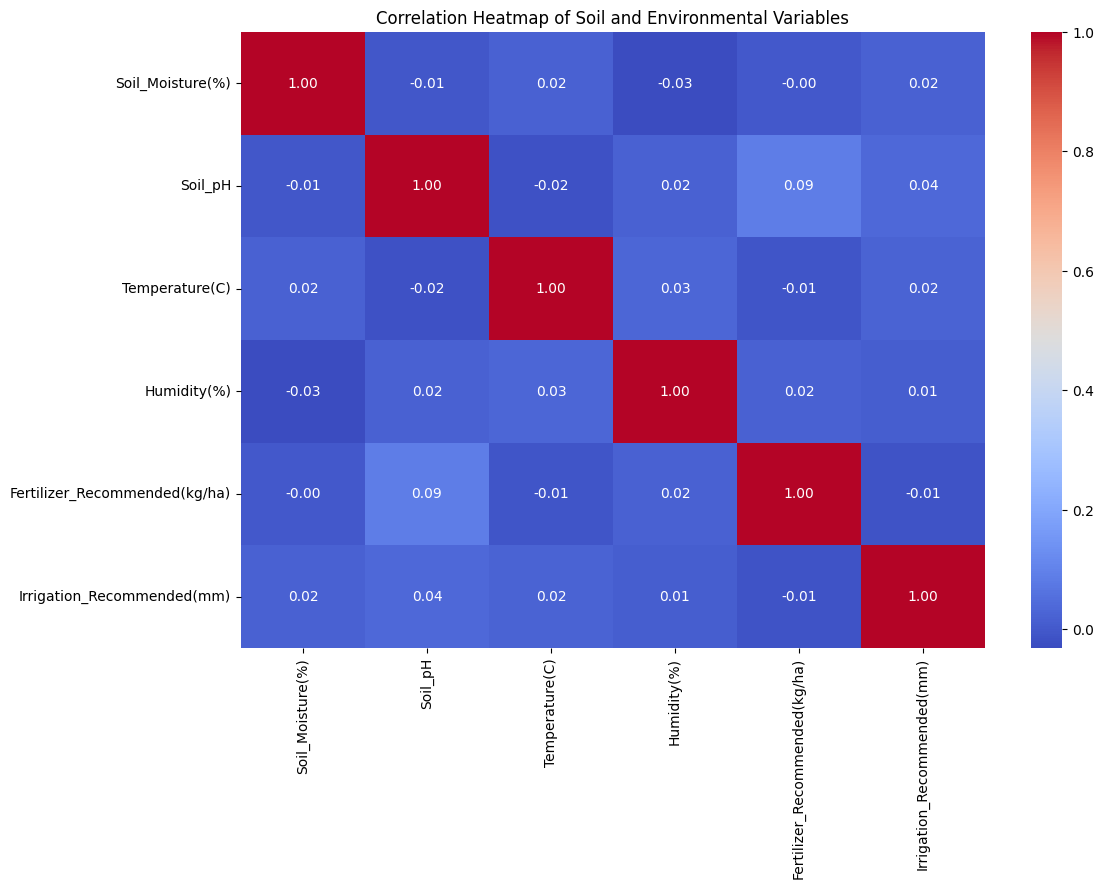

In [28]:
#creating a correlation heatmap to examine the relationships between soil and environmental variables
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Soil and Environmental Variables')
plt.show()

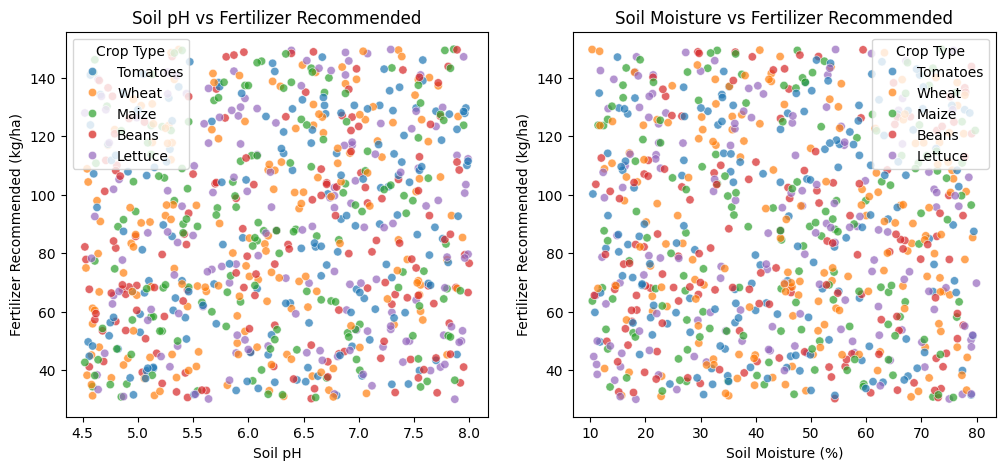

In [32]:


#Visualizing the relationship between Soil pH and Fertilizer Recommended
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Soil_pH', y='Fertilizer_Recommended(kg/ha)', hue='Crop_Type', alpha=0.7)
plt.title('Soil pH vs Fertilizer Recommended')
plt.xlabel('Soil pH')
plt.ylabel('Fertilizer Recommended (kg/ha)')
plt.legend(title='Crop Type')


#Visualizing the relationship between Soil Moisture and Fertilizer Recommended
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Soil_Moisture(%)', y='Fertilizer_Recommended(kg/ha)', hue='Crop_Type', alpha=0.7)
plt.title('Soil Moisture vs Fertilizer Recommended')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Fertilizer Recommended (kg/ha)')
plt.legend(title='Crop Type')
plt.show()


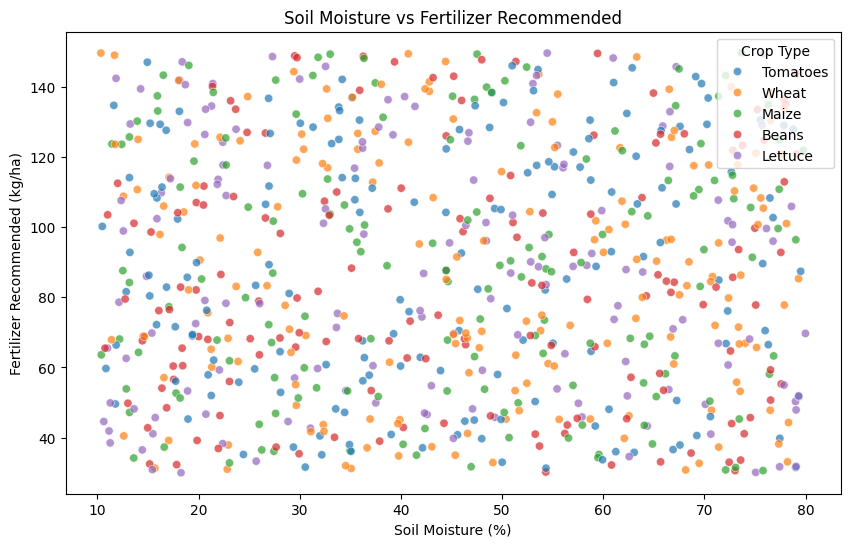

In [33]:
#Visualizing the relationship between Soil Moisture and Fertilizer Recommended
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Soil_Moisture(%)', y='Fertilizer_Recommended(kg/ha)', hue='Crop_Type', alpha=0.7)
plt.title('Soil Moisture vs Fertilizer Recommended')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Fertilizer Recommended (kg/ha)')
plt.legend(title='Crop Type')
plt.show()


    

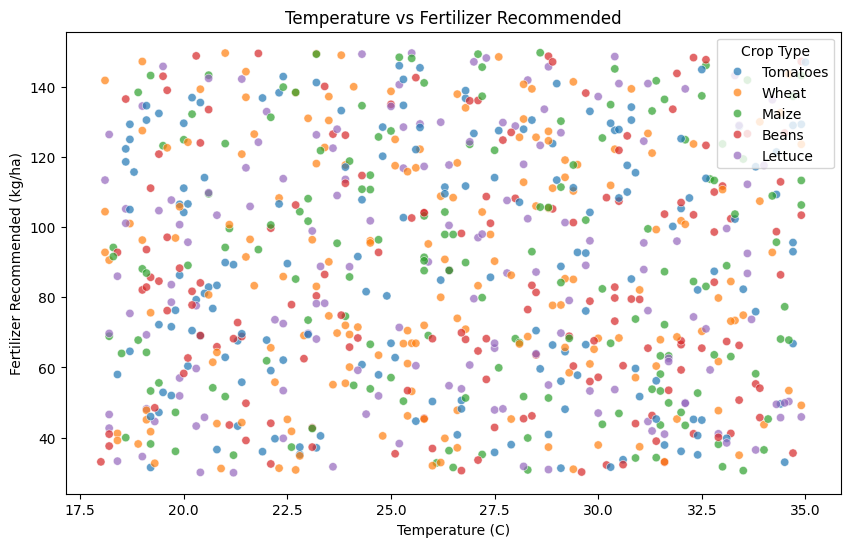

In [31]:
#Visualizing the relationship between Temperature and Fertilizer Recommended
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature(C)', y='Fertilizer_Recommended(kg/ha)', hue='Crop_Type', alpha=0.7)
plt.title('Temperature vs Fertilizer Recommended')
plt.xlabel('Temperature (C)')
plt.ylabel('Fertilizer Recommended (kg/ha)')
plt.legend(title='Crop Type')
plt.show()


In [34]:
#Variables Most Influencing Fertilizer Recommendations

correlation_with_fertilizer = df.select_dtypes(include='number').corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print(correlation_with_fertilizer)

Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085579
Humidity(%)                      0.017054
Soil_Moisture(%)                -0.001719
Temperature(C)                  -0.008135
Irrigation_Recommended(mm)      -0.012447
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [35]:
#Crop Type with Highest Average Soil Moisture
moisture_avg = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print(moisture_avg.head(1))

Crop_Type
Wheat    47.352387
Name: Soil_Moisture(%), dtype: float64


In [36]:
# Irrigation Adjustment for Crops with Average Temperature > 30°C
high_temp_crops = df[df['Temperature(C)'] > 30]
irrigation_recommendations = high_temp_crops.groupby('Crop_Type')['Soil_Moisture(%)'].mean()

print(irrigation_recommendations)

Crop_Type
Beans       46.549038
Lettuce     42.661892
Maize       44.885091
Tomatoes    48.647391
Wheat       44.092432
Name: Soil_Moisture(%), dtype: float64


In [37]:
#Exporting a Cleaned Dataset
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [38]:
#Insights & Recommendations
'''
1.Key Influencing Variables: Soil moisture, soil pH level, and temperature are highly correlated with fertilizer needs.

2.Crop with Highest Soil Moisture: eg wheat has the highest average soil moisture, suggesting it is usually well-irrigated or grown in wet environments.

3.Irrigation Strategy: For crops grown in temperatures above 30°C, increase irrigation frequency especially for  beans, lettuce, maize to compensate for water loss due to evaporation and plant stress.

4.Data Cleaning Impact: Removed duplicates and corrected 100+ erroneous entries. Improved dataset integrity and usability.

'''

'\n1.Key Influencing Variables: Soil moisture, soil pH level, and temperature are highly correlated with fertilizer needs.\n\n2.Crop with Highest Soil Moisture: eg wheat has the highest average soil moisture, suggesting it is usually well-irrigated or grown in wet environments.\n\n3.Irrigation Strategy: For crops grown in temperatures above 30°C, increase irrigation frequency especially for  beans, lettuce, maize to compensate for water loss due to evaporation and plant stress.\n\n4.Data Cleaning Impact: Removed duplicates and corrected 100+ erroneous entries. Improved dataset integrity and usability.\n\n'